# Pima Diabetes Multi-layered Perceptron (MLP) Model

From Bogardus and Lilioja, _Pima Indians as a model to study the genetics of NIDDM_. J Cell Biochem. 1992 Apr;48(4):337-43.

> More than half the Pima Indians over 35 years of age have non-insulin dependent diabetes mellitus (NIDDM). They have been the focus of prospective epidemiologic and metabolic studies for over two decades and the data collected during these studies are now proving invaluable in efforts to find genetic markers for NIDDM in humans. The Pima Indian model of this disease affords two major advantages. The population is genetically homogeneous compared to Caucasian populations, and therefore the causes of NIDDM are less heterogeneous, simplifying genetic linkage studies. Equally important, based on results from metabolic studies, two pre-diabetic phenotypes have been identified in the Pimas: insulin resistance and a low metabolic rate. Use of these phenotypes in genetic linkage analyses should greatly improve chances of finding genetic markers for NIDDM since these phenotypes may be more closely related to the putative abnormal gene products, and actual disease genes, than is the hyperglycemia of the fully developed phenotype of NIDDM.

So this dataset has physiological values for human subjects and is trying to see if those values can be used to predict if someone has diabetes or not. This is a classic binary classification problem.

According to the [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) website these are the features:

Feature name | Feature description
-------------- | ------------------
Pregnancies | Number of times pregnant
Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Blood Pressure | Diastolic blood pressure (mm Hg)
Skin Thickness | Triceps skin fold thickness (mm)
Insulin | 2-Hour serum insulin (mu U/ml)
BMI | Body mass index (weight in kg/(height in m)^2)
Diabetes Pedigree Function | Diabetes pedigree function
Age| Age (years)


Outcome: Class variable (0=no diabetes or 1=diabetes)

Kaggle says that the publically-available data we have is a subset of all woman over the age of 21.


In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

Using TensorFlow backend.


# Keras

[Keras](https://keras.io/) is a high-level neural network API written in Python. It capable of running on top of either TensorFlow, CNTK or Theano. It allows fast experimentation with deep neural network architectures because it handles a lot of the legwork in coding. Think of it as an abstraction of TensorFlow that is specific for generating convolutional and recurrent neural networks.

Keras will automatically determine which deep learning library you have installed. It will default to TensorFlow but fall back on Theano if TensorFlow is not installed.

In [2]:
# fix random seed for reproducibility
np.random.seed(7)
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [3]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Here is the Keras code to set up a multi-layered neural network. 

The code here is generic. If you are using Theano, this will generate Theano code under the hood. If you are using TensorFlow, then it will generate TensorFlow code under the hood. Same high-level Keras code for two different libraries.

## Sequential layers

The simplest neural network is just a linear stack of layers. So layer A goes into layer B which goes into layer C, etc.

In [5]:
model = Sequential()  # My model is a series of connected neural network layers

## First layer

We add our first layer: It's a "dense" layer with 12 nodes and expects 8 inputs (from the X data). So this is 12 neurons. Each neuron gets all 8 inputs. The activation function in a rectified linear unit (ReLu).

In [6]:
model.add(Dense(12, input_dim=8, activation='relu'))

## Second layer

Our second layer is another "dense" layer. We don't need to specify the number of inputs to the layer. Keras already knows that it expects to receive everything output from the previous layer (12 inputs). This layer has 6 nodes and again uses ReLu.

In [7]:
model.add(Dense(6, activation='relu'))



## Dropout layer

[Dropout](https://www.youtube.com/watch?v=UcKPdAM8cnI&) is a remarkably simple idea to prevent the neural network from over-fitting. With dropout, a certain percentage of the neurons in the layer are randomly excluded from the neural network during a given training run. This seems to be enough to prevent over-fitting and it also tends to find network architectures that are optimal. Think of it like an ensemble method like boosting. Every training run is actually trying to fit a slightly different neural network.

[Hinton](http://www.jmlr.org/papers/volume15/srivastava14a.old/source/srivastava14a.pdf) describes it like this:

> It  prevents  overfitting  and provides  a  way  of  approximately  combining  exponentially  many  different  neural  network architectures  efficiently.   The  term  “dropout”  refers  to  dropping  out  units  (hidden  and visible) in a neural network.  By dropping a unit out, we mean temporarily removing it from the network, along with all its incoming and outgoing connections, as shown in Figure 1. The choice of which units to drop is random.  In the simplest case, each unit is retained with a fixed probability p independent of other units, where p can be chosen using a validation set  or  can  simply  be  set  at  0.5,  which  seems  to  be  close  to  optimal  for  a  wide  range  of networks and tasks.  For the input units, however, the optimal probability of retention isusually closer to 1 than to 0.5.

In [8]:
#model.add(Dropout(0.5))

## Third Layer

The third layer is again a "dense" layer. This is our output layer. So we only need 1 neuron (1 node). Since this is a binary classifier, we use the signmoid activation function. If this were a multi-class classifier, then we would use "softmax".

In [9]:
model.add(Dense(1, activation='sigmoid'))

## Compile the graph

Now we ask Keras to compile our graph. Since it is using TensorFlow or Theano, the backpropagation and other baggage is automatically handled for us. We'll use "binary_crossentropy" as the loss function (it measures how "wrong" our classifier is). It uses ["adam"](http://sebastianruder.com/optimizing-gradient-descent/index.html#adam) for the gradient descent method (backpropagation with alpha momentum), and prints the accuracy of the model after every epoch.

In [10]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


## Run the model
This is where the actual training and calculations occur.

If you have your GPU enabled, you can run 'nvidia-smi' from the command line to verify that your GPUs are being used by TensorFlow.

Each epoch is one run through the entire data set. Remember that with stochasitic gradient descent, we typically need multiple runs through the data in order to get to loss minimum.

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Callbacks

We can add lots of goodies when running our models. 

First, we should probably add an "Early Stopping" command. This allows the model to stop the gradient descent if it determines that the error is not changing much. We'll use "value loss" as our metric and wait until it hasn't improved for 10 iterations.

Second, let's save the weights of our model. This way if the computer crashes, we at least have the last best values to start with when we re-run the gradient descent.

Finally, we'll pass in the validation data. Keras will use this to do a simple cross-validation (training error versus testing error). I don't know if there's a K-folds. It might be useful.

In [12]:
# Check if there is a previous weights file and load it if it exists.
# This will allows us to resume from where we left off.
# import os

# if (os.path.exists('pima.wts.h5')):
#     model.load_weights('pima.wts.h5')

# You can also skip SkLearn and do the train/validation split with Keras natively.
#model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10)

# Fit the model
history = model.fit(X_train,
    y_train,
    batch_size=10,  # This is mini-batch gradient descent. So calculate 10 points at a time.
    epochs=150,     # Maximum of 150 epochs
    verbose=2,
    validation_data=(X_test, y_test),
    callbacks = [
        ModelCheckpoint('pima.wts.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    ])

Train on 614 samples, validate on 154 samples
Epoch 1/150
Epoch 00000: val_loss improved from inf to 0.95324, saving model to pima.wts.h5
0s - loss: 2.8912 - acc: 0.5049 - val_loss: 0.9532 - val_acc: 0.6429
Epoch 2/150
Epoch 00001: val_loss improved from 0.95324 to 0.80961, saving model to pima.wts.h5
0s - loss: 0.8345 - acc: 0.6303 - val_loss: 0.8096 - val_acc: 0.6104
Epoch 3/150
Epoch 00002: val_loss improved from 0.80961 to 0.74161, saving model to pima.wts.h5
0s - loss: 0.7309 - acc: 0.6515 - val_loss: 0.7416 - val_acc: 0.6364
Epoch 4/150
Epoch 00003: val_loss did not improve
0s - loss: 0.6900 - acc: 0.6580 - val_loss: 0.8108 - val_acc: 0.6494
Epoch 5/150
Epoch 00004: val_loss improved from 0.74161 to 0.70128, saving model to pima.wts.h5
0s - loss: 0.6579 - acc: 0.6547 - val_loss: 0.7013 - val_acc: 0.6429
Epoch 6/150
Epoch 00005: val_loss did not improve
0s - loss: 0.6267 - acc: 0.6840 - val_loss: 0.7282 - val_acc: 0.6429
Epoch 7/150
Epoch 00006: val_loss did not improve
0s - loss:

There are lots of additional commands when compiling and running the model. For instance, you can do cross-validation and plot the training and testing set loss. You can also calculate F1, AUC, precision, recall, etc.

In [13]:
from sklearn.metrics import classification_report
y_predict = model.predict_classes(X_test)
print()
print()
print(classification_report(y_test, y_predict))

 32/154 [=====>........................] - ETA: 0s()
()
             precision    recall  f1-score   support

        0.0       0.80      0.72      0.76        99
        1.0       0.57      0.67      0.62        55

avg / total       0.72      0.70      0.71       154



## Print the accuracy of the model on the training and testing sets

In [14]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/614 [>.............................] - ETA: 0s
acc: 71.82%


In [15]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/154 [=====>........................] - ETA: 0s
acc: 70.13%


## Let's plot the training and testing errors over epochs

This will tell us if we have over-trained our network. If testing error increases while training error decreases, then we are over-fitting the model.

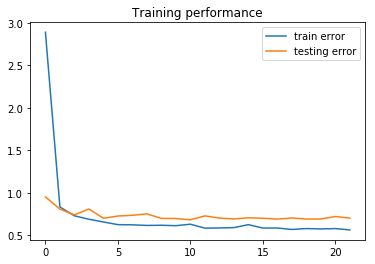

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Show loss curves 
plt.figure();
plt.title('Training performance');
plt.plot(history.epoch, history.history['loss'], label='train error');
plt.plot(history.epoch, history.history['val_loss'], label='testing error');
plt.legend();

## Over-fitting

Let's go back through the model and add dropout.

Here's the idea of what we should see.

In the first graph, we have a neural network that it overfit. (The model is not the current PIMA one; instead I am using a CNN for the CIFAR10 image set).

![overfitting](overfitting.png)

Now I take the same CNN and add in some dropout layers between the convolutional layers. I then re-train the modified model.

![overfitting?](overfittingDROPOUT.png)

Voila! The training and testing errors now match. So overfitting has been corrected.